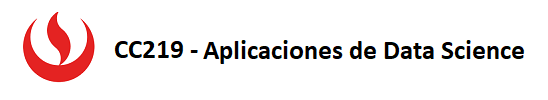

<h3 align="center"><b>TA1:</b> NLP - Normalización de textos </h3>
<h3 align="center">2023-2</h3>




---


**Nombre del Alumno: Renzo Andre Espíritu Cueva**

**Código: u202113340**


---



### **NLP: Normalización de textos y Bolsa de Palabras**

* El corpus que se normalizará consiste en una serie de artículos obtenidos de la web "https://www.elmundotoday.com/".


* Estos artículos se encuentran en el fichero csv **corpus_mundo_today.csv** que deberá adjuntar al notebook.


* Este CSV esta formado por 3 campos que son:
    - Tema
    - Título
    - Texto
    
    
* El ejercicio consiste en Normalizar este ***Corpus*** tomando el *título* y *texto* como contenido de cada documento.

Puede utilizar indistintamente las librerias **NLTK** y **Spacy** para el preprocesamiento (normalización) del texto.


## Ejercicios de Nomalización solicitados:

* Dada una lista en la que cada elemento de la misma tiene el contenido (título + texto) de cada documento del corpus se pide:
<span></span><br><br>
    1. **Crear una función que devuelva los documentos *Tokenizados* (una lista de listas) y con los tokens (palabras) en minúsculas.**
        * **input**: lista de documentos (lista de Strings).
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
<span></span><br><br>
    2. **Crear una función que elimine los tokens que sean signos de puntuación y *Stop-Words*.**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
<span></span><br><br>
    3. **Crear una función que transforme cada token a su lema (*Lematización*)**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
<span></span><br><br>
    4. **Crear una función que elimine todos los tokens que no sean *Nombres* (NOUN, PROPN), *Verbos*, *Advervios* o *Adjetivos*.**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento.
 <span></span><br><br>       
    5. **Función que dada una lista de documentos, devuelva los documentos normalizados. Este ejercicio ya esta hecho y simplemente tiene que funcionar llamando a las 4 funciones anteriores.**
        * **input**: lista de documentos (lista de Strings).
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.


* Finalizada la normalización anterior, se pide:

    6. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, elimine del corpus aquellos tokens que aparecen menos de 'N' veces (N=10) en el corpus**
        * **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
        * **input**: 'N' -> Parámetro que nos indica el número mínimo de apariciones de la palabra en el corpus.
        * **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
<span></span><br><br>
   
<hr>

## Ejercicios de Nomalización:

* Leemos el corpus y pasamos los documentos (Título + Texto) a una lista

In [ ]:
docs_file = 'corpus_mundo_today.csv'
docs_list = list()
file_txt = open(docs_file, encoding="utf8").read()
for line in file_txt.split('\n'):
    line = line.split('||')
    docs_list.append(line[1] + ' ' + line[2])
docs_list = docs_list[1:] # Elimino la cabecera del fichero

#### 1. **Crear una función que devuelva los documentos *Tokenizados* (una lista de listas) y con los tokens (palabras) en minúsculas.** (3ptos)

* **input**: lista de documentos (lista de Strings).
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [ ]:
!python -m spacy download es_core_news_md

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [ ]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenization(docs_list):
    tokens = [word_tokenize(string.lower()) for string in docs_list]
    return tokens

#### 2. **Crear una función que elimine los tokens que sean signos de puntuación y *Stop-Words*.** (3ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [ ]:
def remove_words(docs):
    stop_words = set(stopwords.words('spanish'))  # Puedes cambiar 'spanish' por el idioma que necesites
    sign_punct = set(string.punctuation)
    sign_com = {'“','”'}

    doc_result = []

    for doc in docs:
        tokens = [token for token in doc if token not in stop_words and token not in sign_punct and token not in sign_com and not re.match(r'^[\d\-.]+$', token) and len(token) > 2 ]

        doc_result.append(tokens)

    return doc_result

#### 3. **Crear una función que transforme cada token a su lema (*Lematización*)** (3ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [ ]:
def lematization(docs):
    nlp = spacy.load('es_core_news_md')
    lem_result = []
    for toks in docs:
        doc_str = ' '.join(toks)
        doc = nlp(doc_str)
        lemas = [token.lemma_ for token in doc]
        lem_result.append(lemas)
    return lem_result

#### 4. **Crear una función que elimine todos los tokens que no sean *Nombres* (NOUN, PROPN), *Verbos*, *Advervios* o *Adjetivos*.** (4ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento.

In [ ]:
def filter_words(docs):
    nlp = spacy.load('es_core_news_md')
    doc_filter = []
    for documento_tokens in docs:
        doc_str = ' '.join(documento_tokens)
        doc = nlp(doc_str)
        tok_filter = [token.lemma_ for token in doc if token.pos_ in {'NOUN', 'PROPN', 'VERB', 'ADV', 'ADJ'}]
        doc_filter.append(tok_filter)
    return doc_filter

#### 5. **Función que dada una lista de documentos, devuelva los documentos normalizados. Este ejercicio ya esta hecho y simplemente tiene que funcionar llamando a las 4 funciones anteriores.** (3ptos)

* **input**: lista de documentos (lista de Strings).
* **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.

In [ ]:
def normalization(docs_list):
    corpus = tokenization(docs_list)
    corpus = remove_words(corpus)
    corpus = lematization(corpus)
    corpus = filter_words(corpus)
    return corpus

corpus = normalization(docs_list)
print(corpus[0])

['gobierno', 'español', 'sumar', 'condena', 'cumplir', 'puigdemont', 'después', 'revés', 'recibido', 'gobierno', 'españa', 'puesta', 'libertad', 'car', 'puigdemont', 'parte', 'justicia', 'alemán', 'juez', 'pablo', 'llarena', 'decidido', 'semana', 'instancia', 'ejecutivo', 'sumar', 'oriol', 'condena', 'cumplir', 'líder', 'pdecat', 'exvicepresidente', 'cataluña', 'permanecer', 'prisión', 'madrileño', 'pasar', 'noviembre', 'asumir', 'delito', 'atribuido', 'car', 'puigdemont', 'manerar', 'tribunal', 'supremo', 'asegurar', 'acto', 'expresidente', 'catalán', 'última', 'legislatura', 'quedar', 'impún', 'pagar', 'maniobra', 'ideado', 'burlar', 'justicia', 'alemán', 'líder', 'esquerra', 'republicano', 'enfrentar', 'año', 'prisión', 'seguir', 'adelante', 'caer', 'año', 'parar', 'dicho', 'hoy', 'car', 'puigdemont', 'alemania', 'hacer', 'hacer', 'sacrificar', 'asumire', 'resignación', 'determinación', 'prometido', 'seguim', 'tuitear', 'después', 'trascender', 'decisión', 'llarén', 'fuente', 'anóni

#### En este ejercicio podemos ver como reducimos las palabras (tokens) del texto original, quedandonos con lo importante y normalizado

In [ ]:
def flatten_list(list_of_lists):
  fl_list = []
  for ls in list_of_lists:
    for tk in ls:
      fl_list.append(tk)
  return fl_list

In [ ]:
print('Número de tokens del texto original: ' + str(len(flatten_list(tokenization(docs_list)))))
print('Número de tokens distintos del texto original: ' + str(len(set(flatten_list(tokenization(docs_list))))))
print('Número de tokens tras la normalización: ' + str(len(normalization(docs_list)[0])))
print('Número de tokens distintos tras la normalización: ' + str(len(set(normalization(docs_list)[0]))))

Número de tokens del texto original: 1345
Número de tokens distintos del texto original: 38
Número de tokens tras la normalización: 119
Número de tokens distintos tras la normalización: 98


<hr>

#### 6. **Crear una función que dada una lista de documentos (*corpus*) tokenizados, elimine del corpus aquellos tokens que aparecen menos de 'N' veces (N=10) en el corpus** (4ptos)

* **input**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.
* **input**: 'N' -> Parámetro que nos indica el número mínimo de apariciones de la palabra en el corpus.
* **output**: lista de listas, en la que cada lista contiene los tokens del documento normalizados.

In [ ]:
from collections import Counter

In [ ]:
def drop_less_frecuency_words(corpus, n):
    token_freq = Counter()
    for document in corpus:
        token_freq.update(document)

    frequent_tokens = {token for token, freq in token_freq.items() if freq >= n}

    filtered_corpus = [[token for token in document if token in frequent_tokens] for document in corpus]

    return filtered_corpus

corpus = drop_less_frecuency_words(corpus, 10)
print(corpus[0])